In [1]:
import pandas as pd

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv('C:/Aug_project/data/haechoong_year/Modeling/mice.csv', encoding='ms949')

# 결측치 없는 거 확인

In [74]:
miss1=data.isnull().sum()
miss2=100*data.isnull().sum()/len(data)
miss=pd.DataFrame(miss2,data.columns)
miss

,0
A_NUMPOINT,0.0
B_NUMPOINT,0.0
C_NUMPOINT,0.0
D_NUMPOINT,0.0
E_NUMPOINT,0.0
F_NUMPOINT,0.0
G_NUMPOINT,0.0
m_count,0.0
비율,0.0
산도,0.0


# 분류용 종속변수 생성

In [75]:
data['Y']=0

In [76]:
data['Y'][data['피해발생위험지수']!=0]=1

C:\Users\chuns\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# 데이터 분포 확인

In [77]:
col = data.columns

In [78]:
import platform
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... ')

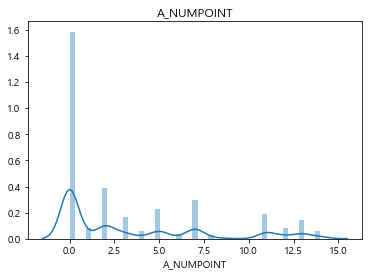

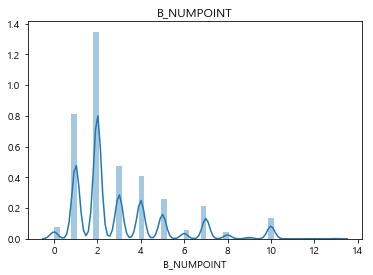

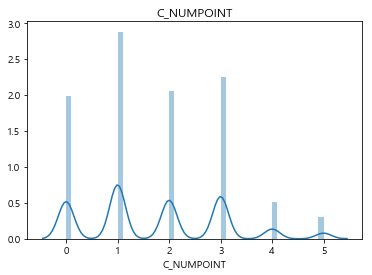

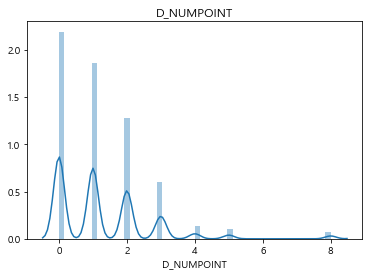

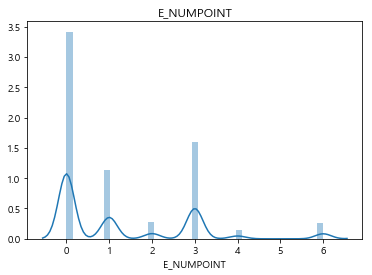

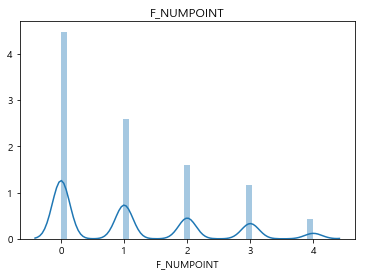

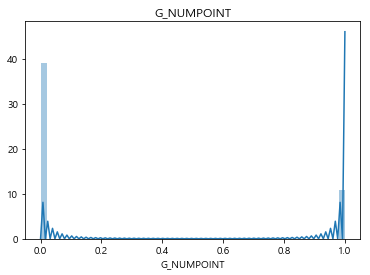

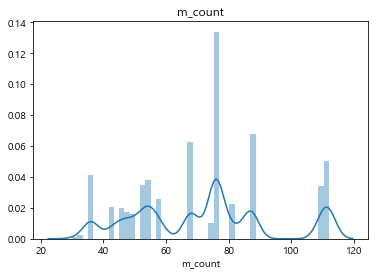

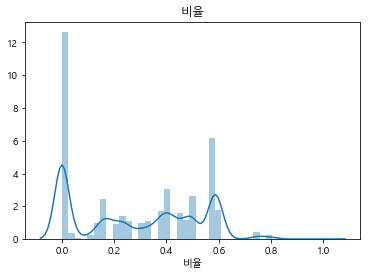

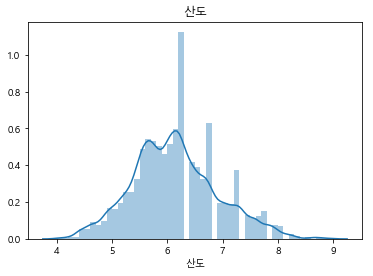

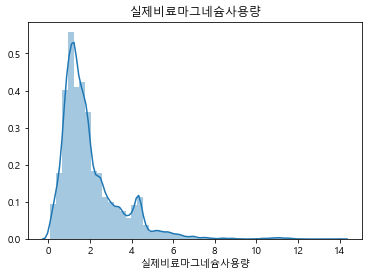

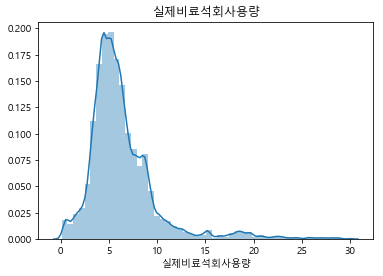

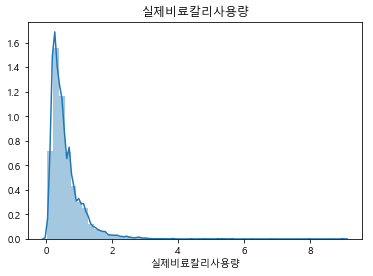

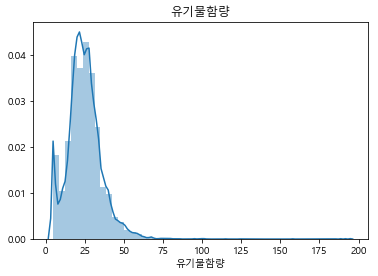

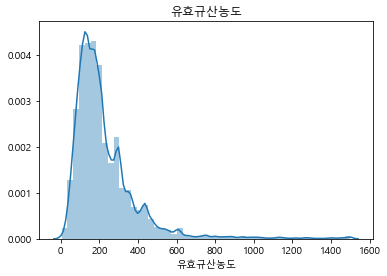

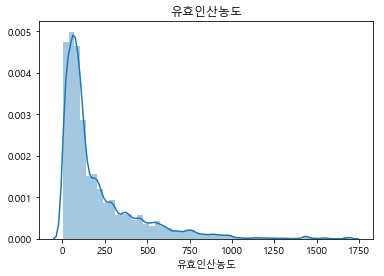

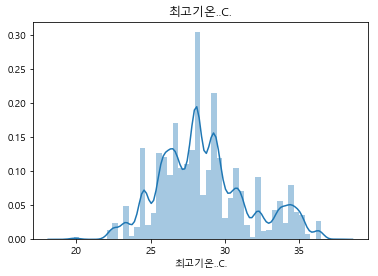

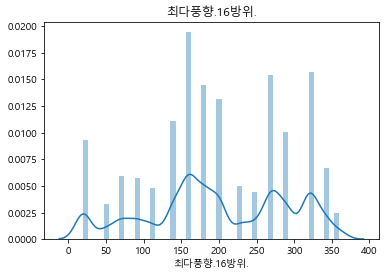

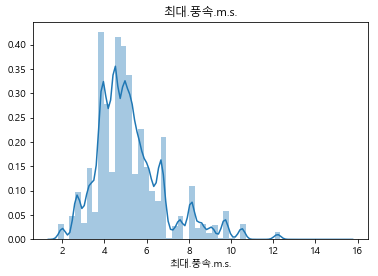

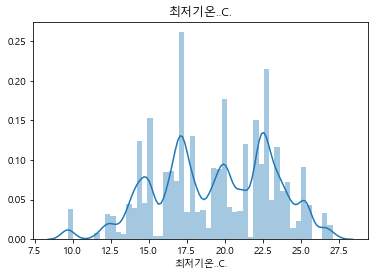

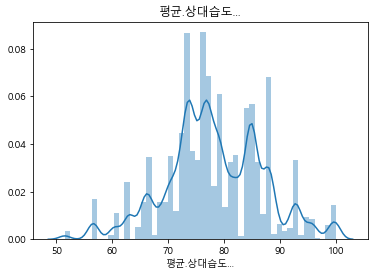

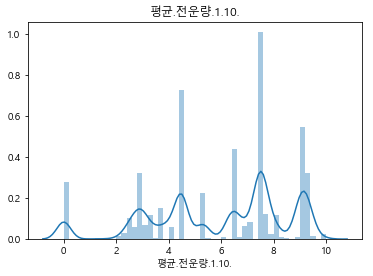

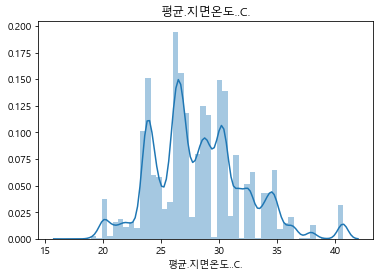

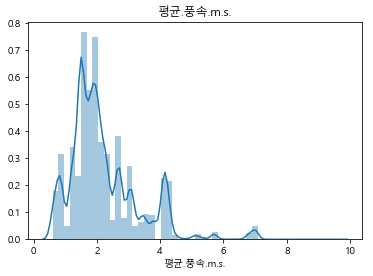

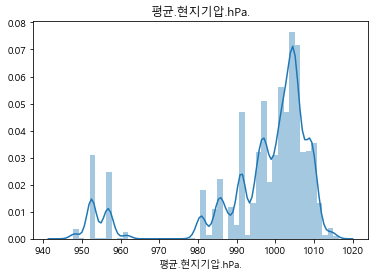

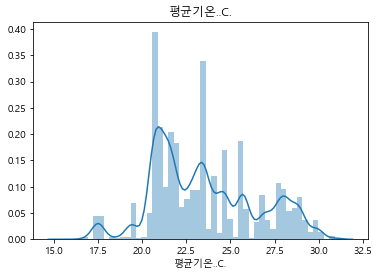

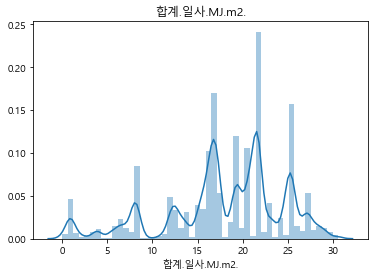

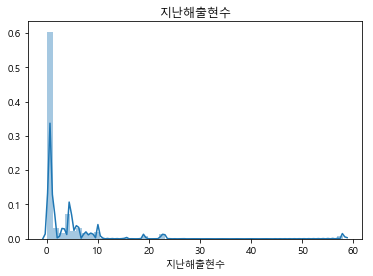

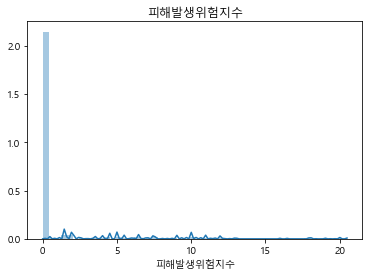

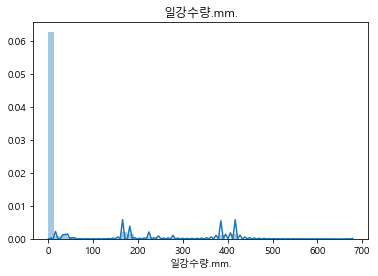

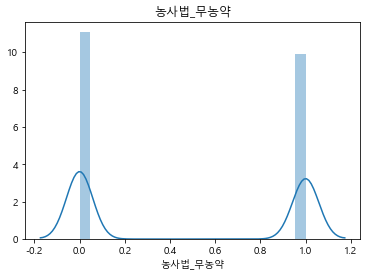

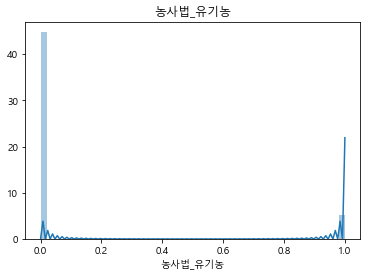

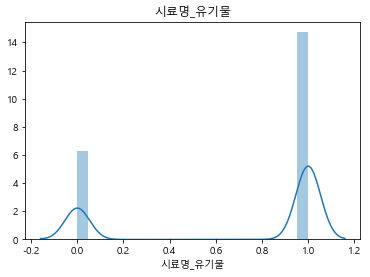

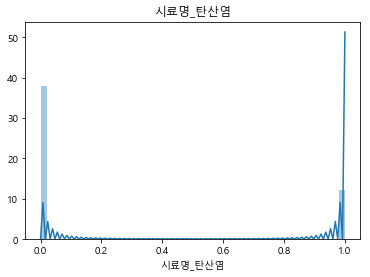

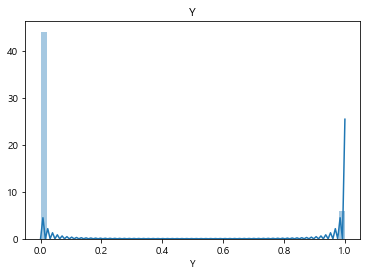

In [79]:
for c in col:
    sns.distplot(data.loc[data[c].notnull(), c])
    plt.title(c)
    plt.show()

# 필요없는 변수 제거

In [81]:
data.columns

Index(['A_NUMPOINT', 'B_NUMPOINT', 'C_NUMPOINT', 'D_NUMPOINT', 'E_NUMPOINT',
       'F_NUMPOINT', 'G_NUMPOINT', 'm_count', '비율', '산도', '실제비료마그네슘사용량',
       '실제비료석회사용량', '실제비료칼리사용량', '유기물함량', '유효규산농도', '유효인산농도', '최고기온..C.',
       '최다풍향.16방위.', '최대.풍속.m.s.', '최저기온..C.', '평균.상대습도...', '평균.전운량.1.10.',
       '평균.지면온도..C.', '평균.풍속.m.s.', '평균.현지기압.hPa.', '평균기온..C.', '합계.일사.MJ.m2.',
       '지난해출현수', '피해발생위험지수', '일강수량.mm.', '농사법_무농약', '농사법_유기농', '시료명_유기물',
       '시료명_탄산염', 'Y'],
      dtype='object')

In [82]:
data = data.drop(columns=['A_NUMPOINT', 'B_NUMPOINT', 'C_NUMPOINT', 'D_NUMPOINT', 'E_NUMPOINT',
       'F_NUMPOINT', 'G_NUMPOINT','최저기온..C.','피해발생위험지수'])

# 변수 로그변환, 표준화 작업

In [83]:
log1=np.array(data['실제비료마그네슘사용량'])
log2=np.array(data['실제비료석회사용량'])
log3=np.array(data['실제비료칼리사용량'])
log4=np.array(data['유기물함량'])
log5=np.array(data['유효규산농도'])
log6=np.array(data['유효인산농도'])
log7=np.array(data['평균.풍속.m.s.'])
log8=np.array(data['평균.현지기압.hPa.'])
log9=np.array(data['평균.전운량.1.10.'])

In [84]:
log_1=np.log(log1)
log_2=np.log(log2)
log_3=np.log(log3)
log_4=np.log(log4)
log_5=np.log(log5)
log_6=np.log(log6)
log_7=np.log(log7)
log_8=np.log(log8)
log_9=np.log(log9+1)

In [85]:
l1 = log_1.reshape(-1,1)
l2 = log_2.reshape(-1,1)
l3 = log_3.reshape(-1,1)
l4 = log_4.reshape(-1,1)
l5 = log_5.reshape(-1,1)
l6 = log_6.reshape(-1,1)
l7 = log_7.reshape(-1,1)
l8 = log_8.reshape(-1,1)
l9 = log_9.reshape(-1,1)

In [86]:
from sklearn.preprocessing import StandardScaler, RobustScaler

import matplotlib.pyplot as plt

In [87]:
sc1 = RobustScaler().fit_transform(l1)
sc2 = RobustScaler().fit_transform(l2)
sc3 = RobustScaler().fit_transform(l3)
sc4 = RobustScaler().fit_transform(l4)
sc5 = RobustScaler().fit_transform(l5)
sc6 = RobustScaler().fit_transform(l6)
sc7 = RobustScaler().fit_transform(l7)
sc8 = RobustScaler().fit_transform(l8)
sc9 = RobustScaler().fit_transform(l9)

In [88]:
data['실제비료마그네슘사용량'] = sc1
data['실제비료석회사용량'] = sc2
data['실제비료칼리사용량'] = sc3
data['유기물함량'] = sc4
data['유효규산농도'] = sc5
data['유효인산농도'] = sc6
data['평균.풍속.m.s.'] = sc7
data['평균.현지기압.hPa.'] = sc8
data['평균.전운량.1.10.'] = sc9

In [89]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,64250,64251,64252,64253,64254,64255,64256,64257,64258,64259
m_count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,68.000000,68.000000,68.000000,68.000000,...,110.000000,110.000000,76.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,55.000000
비율,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,0.250000,...,0.375000,0.375000,0.400000,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.000000
산도,5.500000,5.600000,6.600000,6.400000,6.200000,5.800000,5.800000,5.800000,5.800000,5.800000,...,5.900000,5.900000,5.700000,5.800000,6.500000,6.500000,6.300000,6.800000,5.800000,6.600000
실제비료마그네슘사용량,-0.818364,-0.678035,-0.239917,-0.818364,-1.308916,-0.552505,0.147800,0.147800,0.147800,0.147800,...,0.212217,0.926376,-0.977457,-0.746135,0.079700,-0.977457,-0.552505,0.869966,-0.438950,-0.552505
실제비료석회사용량,-0.348939,-0.167738,-0.235840,-0.029056,0.019112,-0.428514,-0.095365,-0.095365,-0.095365,-0.095365,...,-0.676877,-0.599132,-0.998590,-0.199674,0.126706,0.012764,0.324244,0.214047,0.034884,-0.129464
실제비료칼리사용량,-0.314997,-0.433463,-0.579889,-0.166805,0.042901,0.407298,-0.400017,-0.400017,-0.400017,-0.400017,...,-0.468083,0.063671,-1.225029,0.103945,-0.400017,0.123481,-0.116200,-0.116200,-0.141178,-0.503962
유기물함량,-0.343596,-1.848430,-0.885749,-0.080206,0.711033,0.600145,0.150845,0.150845,0.150845,0.150845,...,-0.343596,0.000000,0.076931,0.290506,-0.542154,0.290506,0.076931,0.000000,-0.440261,-1.155431
유효규산농도,-0.156802,0.410475,0.608277,0.191432,1.009072,-0.040800,-0.075878,-0.075878,-0.075878,-0.075878,...,-1.111878,0.013302,-0.418919,0.114785,0.410475,-0.040800,0.608277,2.567123,0.032986,-1.128666
유효인산농도,-0.146069,-0.404692,0.333879,0.695345,-0.461764,0.055399,-0.082884,-0.082884,-0.082884,-0.082884,...,-0.153481,0.151066,-0.593388,0.358239,-0.342176,-0.600717,-0.564865,0.178591,-0.859340,-0.191849
최고기온..C.,29.800000,29.800000,29.800000,29.800000,29.800000,29.800000,31.100000,31.100000,31.100000,31.100000,...,23.200000,23.200000,23.600000,24.200000,24.200000,24.200000,24.200000,24.200000,24.200000,23.600000


# Train set, Test set 분할하고 RandomForest 모델링

In [90]:
dfx=data.drop(columns=['Y'])
dfy=data[['Y']]

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time

In [92]:
ddfx=np.array(dfx)
ddfy=np.array(dfy)

In [93]:
nX_train, nX_test, ny_train, ny_test = train_test_split(ddfx, ddfy, test_size=0.3, random_state=54)

In [94]:
print('Training Features Shape:', nX_train.shape)
print('Training Labels Shape:', ny_train.shape)
print('Testing Features Shape:', nX_test.shape)
print('Testing Labels Shape:', ny_test.shape)

Training Features Shape: (44982, 25)
Training Labels Shape: (44982, 1)
Testing Features Shape: (19278, 25)
Testing Labels Shape: (19278, 1)


In [110]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 200, random_state =54)
# Train the model on training data
rf.fit(nX_train, ny_train);

C:\Users\chuns\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# 예측하고 성능 측정

In [96]:
predictions = rf.predict(nX_test)
pre=predictions.reshape(nX_test.shape[0],1)
pre

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [114]:
rf.score(nX_test, ny_test)

0.9345886502749248

# Confusion Matrix 

(0.0, 2.0, 2.0, 0.0)

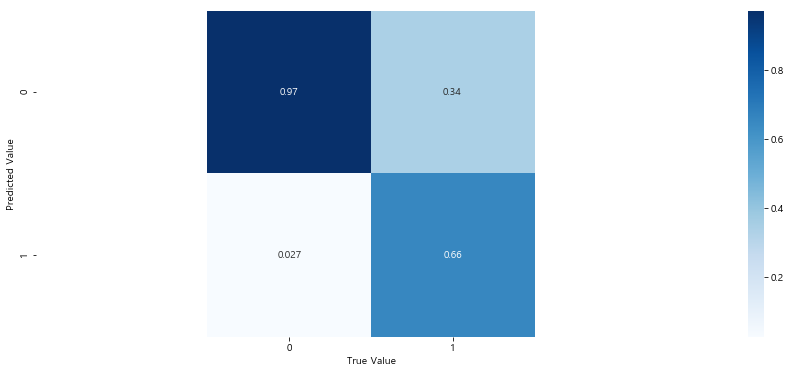

In [98]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(figsize=(15,6))

cm = confusion_matrix(ny_test, predictions).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

## 해충 비발생 지역이 0 ->  예측 97%로 과적합 예상. 데이터 수가 0에 치우쳤기 떄문으로 추정
## 해충 발생 지역이 1 -> 1을 1이라고 예측한 확률이 66%
# 해충 예상 지역을 정확히 맞추는 것이 중요하므로 66%에 초점을 둠

In [99]:
data.columns

Index(['m_count', '비율', '산도', '실제비료마그네슘사용량', '실제비료석회사용량', '실제비료칼리사용량', '유기물함량',
       '유효규산농도', '유효인산농도', '최고기온..C.', '최다풍향.16방위.', '최대.풍속.m.s.',
       '평균.상대습도...', '평균.전운량.1.10.', '평균.지면온도..C.', '평균.풍속.m.s.',
       '평균.현지기압.hPa.', '평균기온..C.', '합계.일사.MJ.m2.', '지난해출현수', '일강수량.mm.',
       '농사법_무농약', '농사법_유기농', '시료명_유기물', '시료명_탄산염', 'Y'],
      dtype='object')

# 변수 중요도 그리기

In [115]:
c = ['m_count', '비율', '산도', '실제비료마그네슘사용량', '실제비료석회사용량', '실제비료칼리사용량', '유기물함량',
       '유효규산농도', '유효인산농도', '최고기온..C.', '최다풍향.16방위.', '최대.풍속.m.s.',
       '평균.상대습도...', '평균.전운량.1.10.', '평균.지면온도..C.', '평균.풍속.m.s.',
       '평균.현지기압.hPa.', '평균기온..C.', '합계.일사.MJ.m2.', '지난해출현수', '일강수량.mm.',
       '농사법_무농약', '농사법_유기농', '시료명_유기물', '시료명_탄산염']

In [116]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [104]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(dfx, round(importance, 2)) for feature, importance in zip(c, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

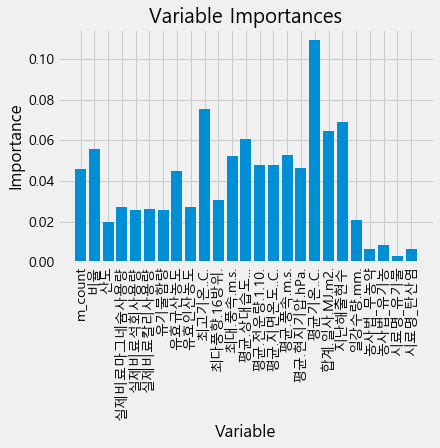

In [113]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, c, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [119]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,64250,64251,64252,64253,64254,64255,64256,64257,64258,64259
m_count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,68.000000,68.000000,68.000000,68.000000,...,110.000000,110.000000,76.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,55.000000
비율,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,0.250000,...,0.375000,0.375000,0.400000,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.000000
산도,5.500000,5.600000,6.600000,6.400000,6.200000,5.800000,5.800000,5.800000,5.800000,5.800000,...,5.900000,5.900000,5.700000,5.800000,6.500000,6.500000,6.300000,6.800000,5.800000,6.600000
실제비료마그네슘사용량,-0.818364,-0.678035,-0.239917,-0.818364,-1.308916,-0.552505,0.147800,0.147800,0.147800,0.147800,...,0.212217,0.926376,-0.977457,-0.746135,0.079700,-0.977457,-0.552505,0.869966,-0.438950,-0.552505
실제비료석회사용량,-0.348939,-0.167738,-0.235840,-0.029056,0.019112,-0.428514,-0.095365,-0.095365,-0.095365,-0.095365,...,-0.676877,-0.599132,-0.998590,-0.199674,0.126706,0.012764,0.324244,0.214047,0.034884,-0.129464
실제비료칼리사용량,-0.314997,-0.433463,-0.579889,-0.166805,0.042901,0.407298,-0.400017,-0.400017,-0.400017,-0.400017,...,-0.468083,0.063671,-1.225029,0.103945,-0.400017,0.123481,-0.116200,-0.116200,-0.141178,-0.503962
유기물함량,-0.343596,-1.848430,-0.885749,-0.080206,0.711033,0.600145,0.150845,0.150845,0.150845,0.150845,...,-0.343596,0.000000,0.076931,0.290506,-0.542154,0.290506,0.076931,0.000000,-0.440261,-1.155431
유효규산농도,-0.156802,0.410475,0.608277,0.191432,1.009072,-0.040800,-0.075878,-0.075878,-0.075878,-0.075878,...,-1.111878,0.013302,-0.418919,0.114785,0.410475,-0.040800,0.608277,2.567123,0.032986,-1.128666
유효인산농도,-0.146069,-0.404692,0.333879,0.695345,-0.461764,0.055399,-0.082884,-0.082884,-0.082884,-0.082884,...,-0.153481,0.151066,-0.593388,0.358239,-0.342176,-0.600717,-0.564865,0.178591,-0.859340,-0.191849
최고기온..C.,29.800000,29.800000,29.800000,29.800000,29.800000,29.800000,31.100000,31.100000,31.100000,31.100000,...,23.200000,23.200000,23.600000,24.200000,24.200000,24.200000,24.200000,24.200000,24.200000,23.600000
